<a href="https://colab.research.google.com/github/PrathameshS26/Hand-written-digit-detection-CNN/blob/main/Hand_written_digit_detection_CNN_%7C_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 9.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import visualkeras

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


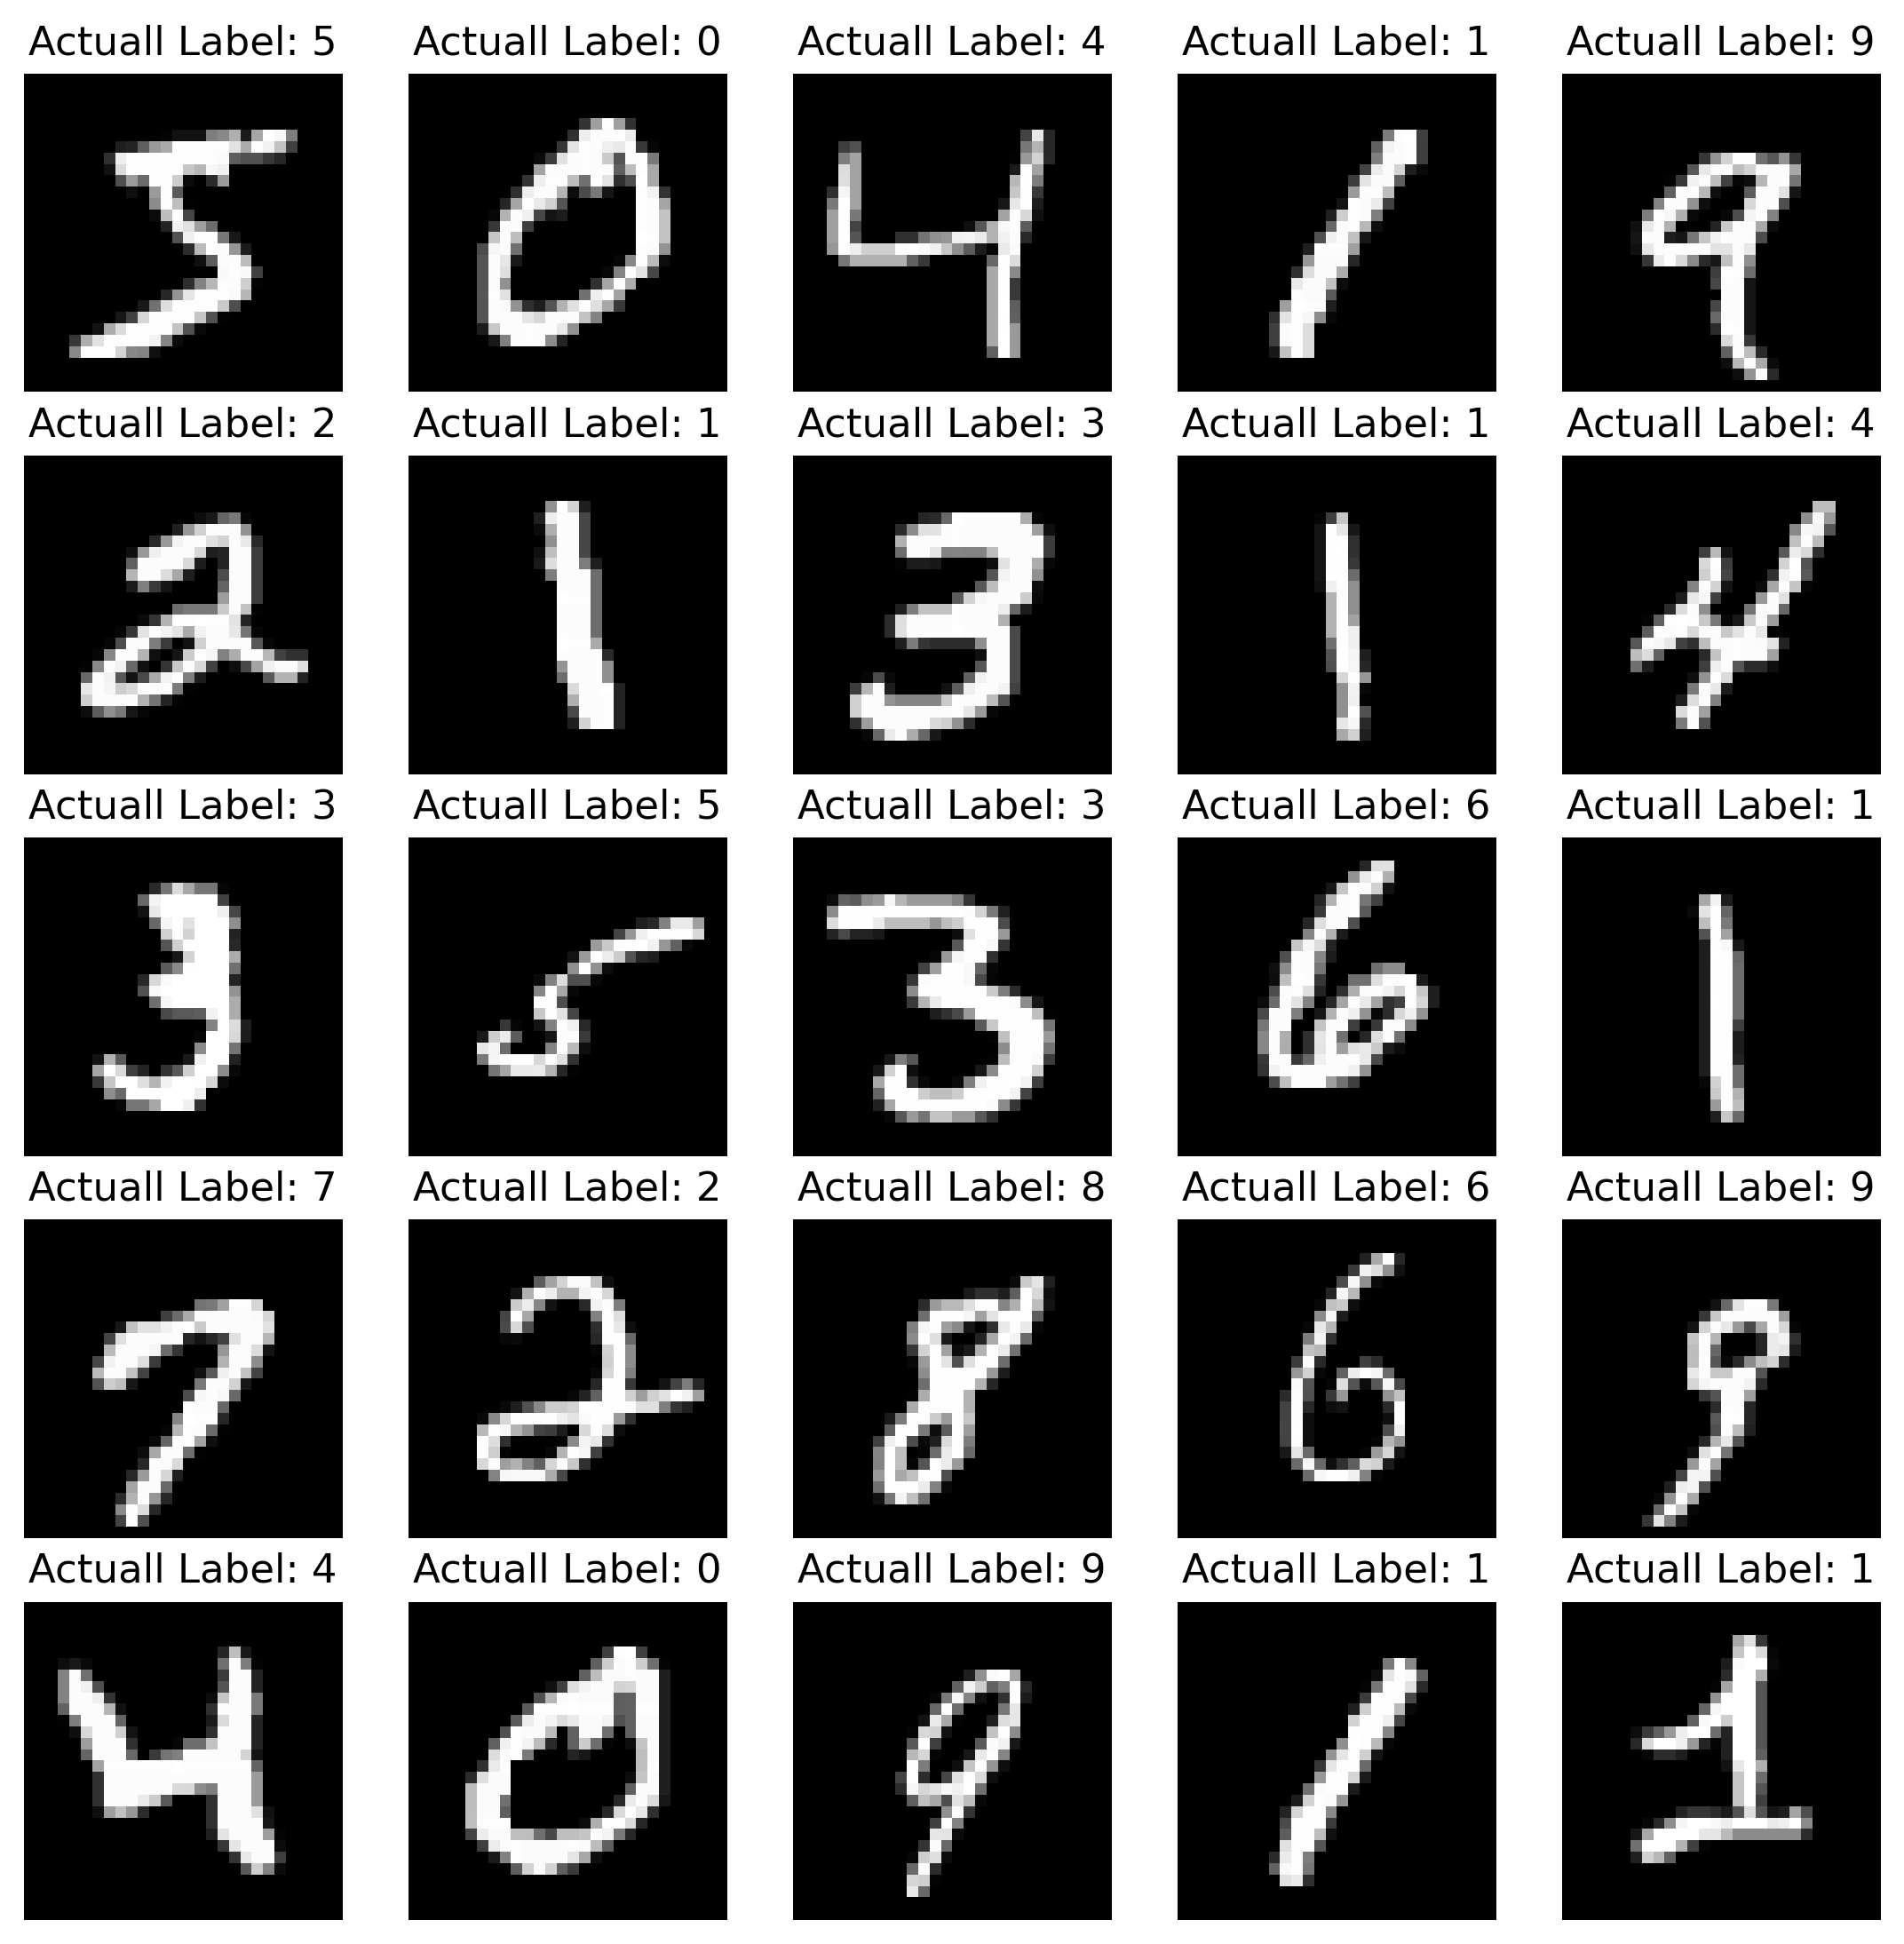

In [4]:
plt.figure(figsize=(10, 10), dpi=270)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actuall Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

In [5]:
def plot_training_history_with_plotly(history):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['accuracy']) + 1)),
        y=history.history['accuracy'],
        mode='lines',
        name='Train Accuracy'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_accuracy']) + 1)),
        y=history.history['val_accuracy'],
        mode='lines',
        name='Validation Accuracy'
    ))

    fig.update_layout(
        title='Model Accuracy',
        xaxis_title='Epoch',
        yaxis_title='Accuracy',
        legend=dict(x=0, y=1),
    )

    fig.show()

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['loss']) + 1)),
        y=history.history['loss'],
        mode='lines',
        name='Train Loss'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_loss']) + 1)),
        y=history.history['val_loss'],
        mode='lines',
        name='Validation Loss'
    ))

    fig.update_layout(
        title='Model Loss',
        xaxis_title='Epoch',
        yaxis_title='Loss',
        legend=dict(x=0, y=1),
    )

    fig.show()

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
lanet5_model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


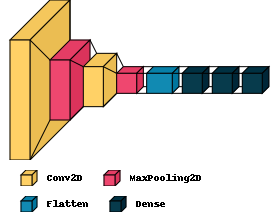

In [8]:
visualkeras.layered_view(lanet5_model, scale_xy=5, legend=True)

In [9]:
lanet5_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lanet5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [10]:
lanet5_history = lanet5_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 29s 28ms/step - loss: 0.2655 - accuracy: 0.9179 - val_loss: 0.0791 - val_accuracy: 0.9767
Epoch 2/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0784 - accuracy: 0.9753 - val_loss: 0.0474 - val_accuracy: 0.9850
Epoch 3/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.0447 - val_accuracy: 0.9852
Epoch 4/10
938/938 [==============================] - 26s 28ms/step - loss: 0.0445 - accuracy: 0.9862 - val_loss: 0.0407 - val_accuracy: 0.9862
Epoch 5/10
938/938 [==============================] - 26s 28ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0378 - val_accuracy: 0.9874
Epoch 6/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0330 - val_accuracy: 0.9890
Epoch 7/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0375 - val_accuracy:

In [11]:
plot_training_history_with_plotly(lanet5_history)

In [12]:
model_2 = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Dropout(0.25),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Dropout(0.25),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dropout(0.5),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning:

The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.



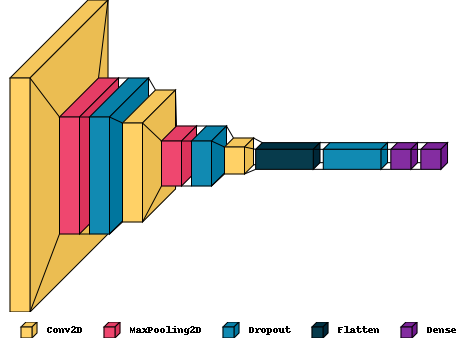

In [13]:
visualkeras.layered_view(model_2, scale_xy=9, legend=True)

In [14]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [15]:
model_2_history = model_2.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 64s 66ms/step - loss: 0.3117 - accuracy: 0.8988 - val_loss: 0.0659 - val_accuracy: 0.9787
Epoch 2/10
938/938 [==============================] - 60s 64ms/step - loss: 0.0994 - accuracy: 0.9696 - val_loss: 0.0474 - val_accuracy: 0.9853
Epoch 3/10
938/938 [==============================] - 60s 64ms/step - loss: 0.0789 - accuracy: 0.9751 - val_loss: 0.0342 - val_accuracy: 0.9883
Epoch 4/10
938/938 [==============================] - 61s 65ms/step - loss: 0.0653 - accuracy: 0.9797 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 5/10
938/938 [==============================] - 61s 65ms/step - loss: 0.0586 - accuracy: 0.9818 - val_loss: 0.0267 - val_accuracy: 0.9917
Epoch 6/10
938/938 [==============================] - 67s 71ms/step - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.0297 - val_accuracy: 0.9911
Epoch 7/10
938/938 [==============================] - 63s 67ms/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0272 - val_accuracy:

In [16]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 7s 21ms/step - loss: 0.0233 - accuracy: 0.9926
Test accuracy: 0.9926000237464905


In [17]:
plot_training_history_with_plotly(model_2_history)

In [18]:
model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

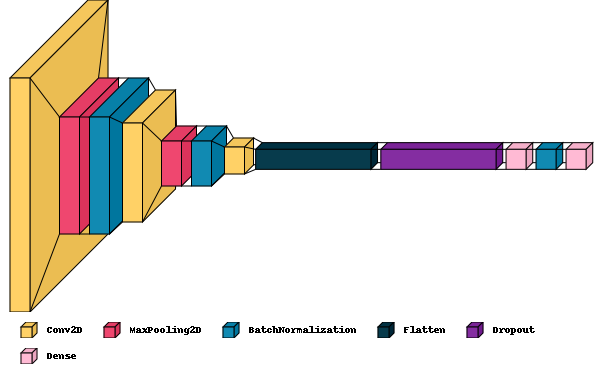

In [19]:
visualkeras.layered_view(model_3, scale_xy=9, legend=True)

In [20]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                      

In [21]:
model_3_history = model_3.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 70s 72ms/step - loss: 0.1284 - accuracy: 0.9601 - val_loss: 0.0419 - val_accuracy: 0.9864
Epoch 2/10
938/938 [==============================] - 65s 69ms/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.0394 - val_accuracy: 0.9878
Epoch 3/10
938/938 [==============================] - 65s 69ms/step - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0320 - val_accuracy: 0.9907
Epoch 4/10
938/938 [==============================] - 63s 68ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0256 - val_accuracy: 0.9925
Epoch 5/10
938/938 [==============================] - 65s 70ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoch 6/10
938/938 [==============================] - 68s 73ms/step - loss: 0.0257 - accuracy: 0.9920 - val_loss: 0.0266 - val_accuracy: 0.9917
Epoch 7/10
938/938 [==============================] - 63s 68ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0262 - val_accuracy:

In [22]:
test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 7s 23ms/step - loss: 0.0233 - accuracy: 0.9925
Test accuracy: 0.9925000071525574


In [23]:
plot_training_history_with_plotly(model_3_history)

In [24]:
predictions = model_3.predict(test_images)

313/313 [==============================] - 5s 15ms/step


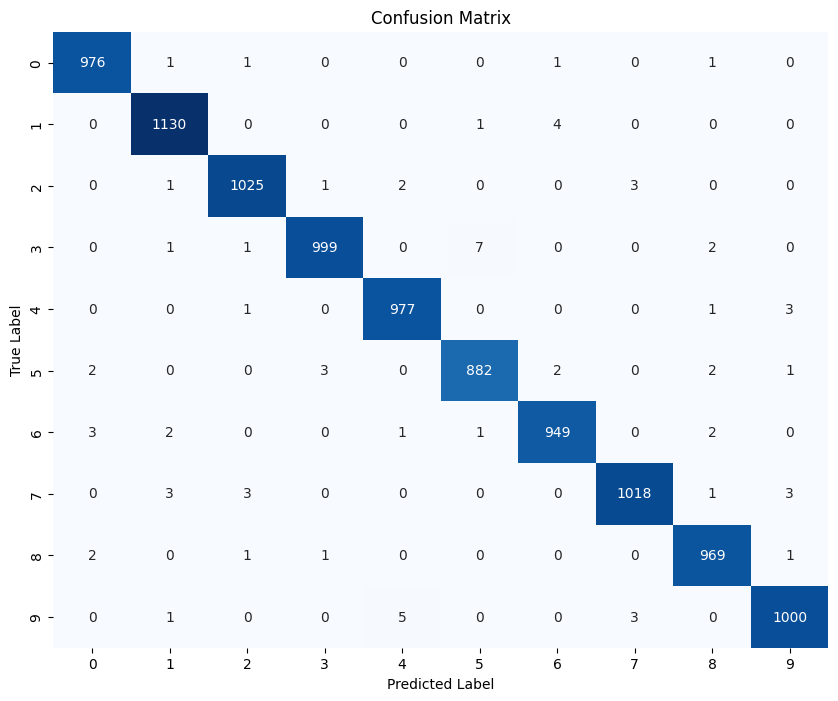


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [25]:
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('\nClassification Report:\n', classification_report(true_labels, predicted_labels))

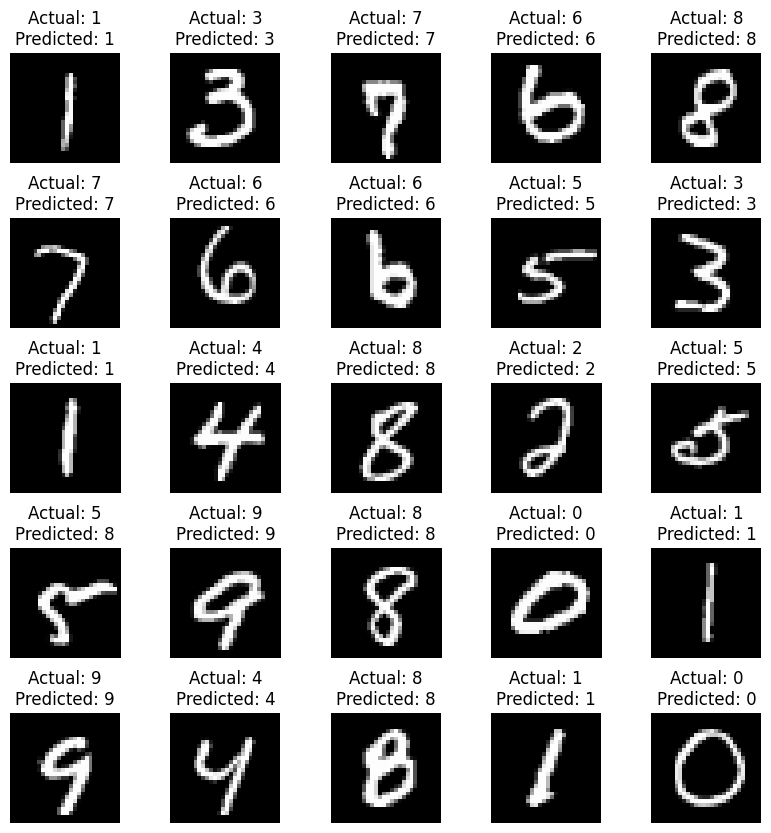

In [26]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for i in range(25):
    random_index = random.randint(0, test_images.shape[0] - 1)

    # Display the test image
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[random_index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {np.argmax(test_labels[random_index])}\nPredicted: {predictions[random_index].argmax()}")
    plt.axis('off')

plt.show()